# Guía para Resolver Sistemas de Ecuaciones Lineales
## Usando el Método de Sustitución y el Método de Cramer

Bienvenido a esta guía que tiene como objetivo enseñar cómo resolver sistemas de ecuaciones lineales utilizando el método de sustitución y el método de Cramer. Al final, veremos cómo la solución de un sistema de ecuaciones lineales corresponde a la intersección de dos rectas en un plano cartesiano.


El sistema que resolveremos es el siguiente:
$$\
\begin{cases}
2x + y = 8 \\
x - y = 2
\end{cases}
\
$$

## Método de Sustitución

El método de sustitución es uno de los más simples y comunes para resolver sistemas de ecuaciones lineales con dos incógnitas. La idea es despejar una variable en términos de la otra en una de las ecuaciones, y luego sustituirla en la otra ecuación.

### Pasos:
1. Despejar una incógnita en una de las ecuaciones.
2. Sustituir la expresión obtenida en la otra ecuación.
3. Resolver la ecuación resultante.
4. Sustituir el valor obtenido en alguna de las ecuaciones originales para encontrar la otra incógnita.


In [ ]:
# Ejemplo resuelto método de sustitución
from sympy import symbols, Eq, solve

# Definir las variables
x, y = symbols('x y')

# Definir las ecuaciones
eq1 = Eq(2*x + y, 8)
eq2 = Eq(x - y, 2)

# Despejar 'y' en términos de 'x' en la primera ecuación
y_despejada = solve(eq1, y)[0]

# Sustituir 'y' en la segunda ecuación y resolver para 'x'
eq2_sustituida = eq2.subs(y, y_despejada)
sol_x = solve(eq2_sustituida, x)[0]

# Sustituir el valor de 'x' en alguna de las ecuaciones originales
# para encontrar 'y'
sol_y = solve(eq1.subs(x, sol_x), y)[0]

sol_x, sol_y


(10/3, 4/3)

## Método de Cramer

El método de Cramer es una forma matricial de resolver sistemas de ecuaciones lineales. Solo es aplicable cuando el determinante de la matriz de coeficientes es diferente de cero.

### Pasos:
1. Encontrar el determinante de la matriz de coeficientes.
2. Para cada incógnita, sustituir la columna correspondiente por el vector de términos independientes y calcular el determinante.
3. Dividir el determinante obtenido por el determinante de la matriz de coeficientes.


In [ ]:
import numpy as np

# Definir la matriz de coeficientes A y el vector de términos independientes b
A = np.array([[2, 1], [1, -1]])
b = np.array([8, 2])

# Calcular el determinante de A
det_A = np.linalg.det(A)

# Crear matrices modificadas y calcular sus determinantes
A_x = A.copy()
A_x[:, 0] = b
det_A_x = np.linalg.det(A_x)

A_y = A.copy()
A_y[:, 1] = b
det_A_y = np.linalg.det(A_y)

# Calcular las soluciones
sol_x = det_A_x / det_A
sol_y = det_A_y / det_A

sol_x, sol_y


(3.333333333333333, 1.3333333333333335)

In [ ]:
# método de resolución directa
from sympy import linsolve

# Definir las ecuaciones
eq1 = Eq(2*x + y, 8)
eq2 = Eq(x - y, 2)

# Resolver el sistema de ecuaciones
sol = linsolve([eq1, eq2], x, y)
sol


{(10/3, 4/3)}

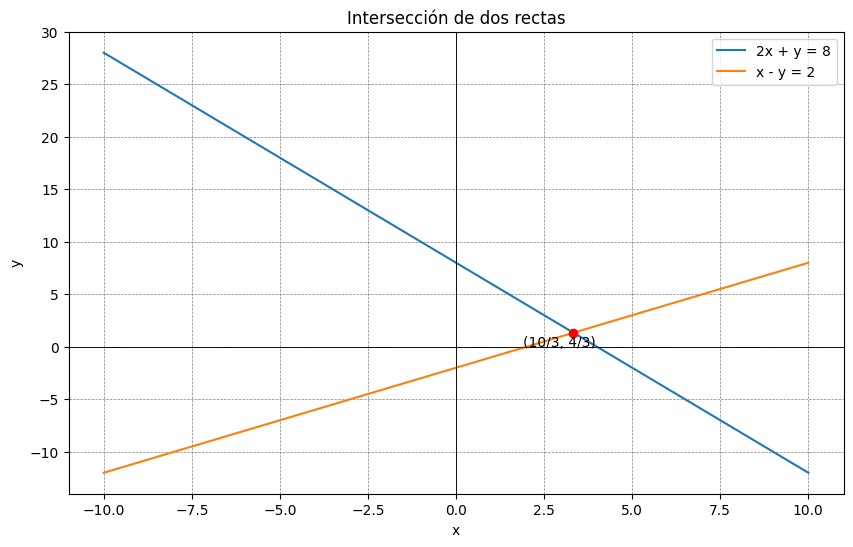

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

# Definir las ecuaciones
def eq1(x):
    return 8 - 2*x

def eq2(x):
    return x - 2

# Crear un array de valores de x
x = np.linspace(-10, 10, 400)

# Crear un array de valores de y para cada ecuación
y1 = eq1(x)
y2 = eq2(x)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.plot(x, y1, label='2x + y = 8')
plt.plot(x, y2, label='x - y = 2')

# Marcar el punto de intersección
plt.plot(sol_x, sol_y, 'ro')  # sol_x y sol_y son las soluciones del sistema
sol_x_frac = Fraction(float(sol_x)).limit_denominator()
sol_y_frac = Fraction(float(sol_y)).limit_denominator()
plt.annotate(f'({sol_x_frac}, {sol_y_frac})', (sol_x, sol_y),
             textcoords="offset points", xytext=(-10,-10), ha='center')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Intersección de dos rectas')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()
